# <center>ECSE 415 - Assignment 1</center>
  ### <center>Patrick Erath - 260719203 </center>

## 1 - Invariance of SIFT Features

### 1.1 Invariance Under Changes in Scale

1. Compute SIFT keypoints for the reference image

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Read in book
img = cv2.imread("book.jpg")

# Conver to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Create a SIFT object
sift = cv2.xfeatures2d.SIFT_create()

# Detect the SIFT features with no masks
keypoints = sift.detect(img, None)
print("Number of keypoints:\t", len(keypoints))

#TODO? : draw keypoints

Number of keypoints:	 385


2. Scale Reference image using scaling factors of (0.2, 0.5, 0.8, 1.25, 2, 5)

In [5]:
# Create a rotated scaled duplicate by creating rotation matrices
# Rotation matrix around the center pixel with 0 degrees, and scale n
height, width = img.shape[0:2]
Scales = [0.2, 0.5, 0.8, 1.25, 2, 5]
imgs_arr = []

# Iterate over each scale and create a rotation matrix with
# center = (width/2, height/2)
# Then apply transformation matrix and append to image
for x in range(len(Scales)):
    M_temp = cv2.getRotationMatrix2D((width/2, height/2), 0, Scales[x])
    img_temp = cv2.warpAffine(img, M_temp, (width,height))
    imgs_arr.append(img_temp)

3. Compute SIFT keypoints for the transformed images

In [6]:
keypoints_arr = []
descriptors_arr = []
    
# Iterate over the scaled images and find the keypoint and descriptor for each
# Then append the keypoints and descriptors to keypoints & descriptor arrays
for i in range(len(imgs_arr)):
    keypoint_temp, descriptor_temp = sift.detectAndCompute(imgs_arr[i], None)
    print("Keypoint number for scaling factor: "+str(Scales[i])+" is: "+str(len(keypoint_temp)))
    keypoints_arr.append(keypoint_temp)
    descriptors_arr.append(descriptor_temp)

Keypoint number for scaling factor: 0.2 is: 42
Keypoint number for scaling factor: 0.5 is: 130
Keypoint number for scaling factor: 0.8 is: 305
Keypoint number for scaling factor: 1.25 is: 675
Keypoint number for scaling factor: 2 is: 1060
Keypoint number for scaling factor: 5 is: 271


4. Match all keypoints of the reference image to the transformed image using a brute-force method

In [7]:
# Create a BFMatcher object
bf = cv2.BFMatcher()

# Get descriptors for original image
keypoint_orig, descriptor_orig = sift.detectAndCompute(img, None)
matches_arr = []

# Match descriptors and append to matching array
for i in range(len(descriptors_arr)):
    match_temp = bf.match(descriptor_orig, descriptors_arr[i])
    matches_arr.append(match_temp)

5. Sort all matching keypoints according to the matching distance

In [8]:
# Sort descriptors according to the matching distance
for i in range(len(matches_arr)):
    matches_arr[i] = sorted(matches_arr[i], key = lambda x:x.distance)

6. Display top ten matched keypoints for each pair of reference image and a transformed image

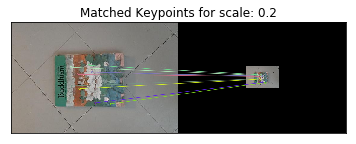

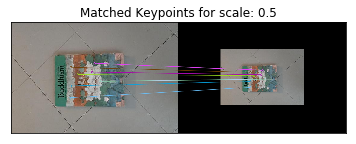

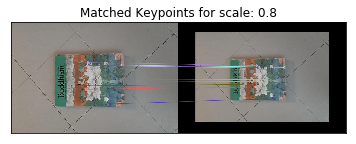

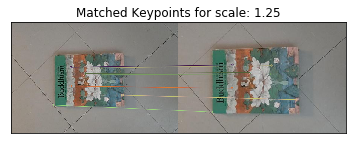

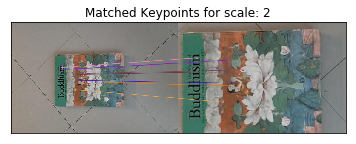

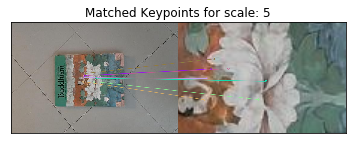

In [9]:
# Find top ten matched keypoints for each scaled image and display
for i in range(6):
    img_temp = cv2.drawMatches(img, keypoint_orig, 
                               imgs_arr[i], keypoints_arr[i],
                               matches_arr[i][:10], None, flags=2
                              )
    plt.figure(figsize=(6,3))
    plt.imshow(img_temp)
    plt.title("Matched Keypoints for scale: "+str(Scales[i]))
    plt.xticks([]), plt.yticks([])
plt.show()

7. Plot the matching distance for the top 100 matched keypoints. Plot indices of keypoints on x-axis and corresponding matching distance on y-axis

In [ ]:
# Arrange matching keypoints in two seperate lists

print("test")

x_axis = np.arange(100)      
for i in range(6):
    distance_temp = []
    for i, m in enumerate(matches_arr[i]):
        distance_temp.append(m.distance)
            
    
    #print(distance_temp)
    plt.figure(figsize=(6,3))
    plt.plot(x_axis, distance_temp[:100])
    plt.title("Keypoint")
    plt.axis(x

test


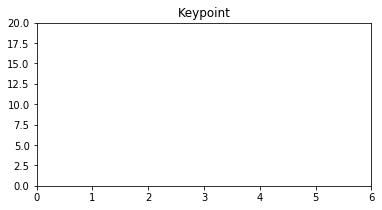

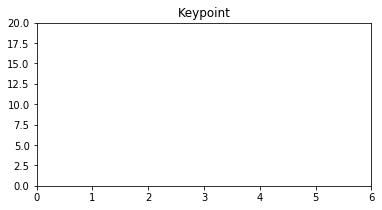

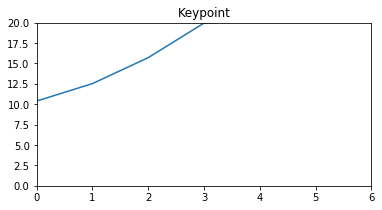

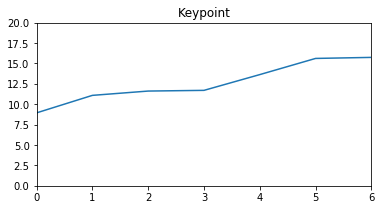

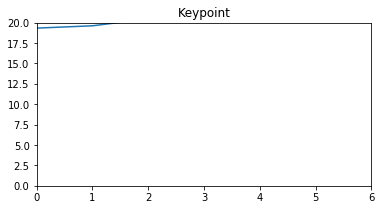

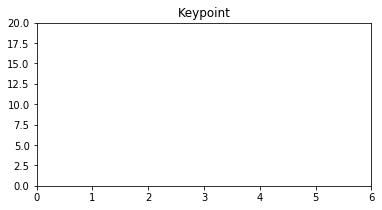

In [12]:
)
    
plt.show()

In [ ]:
print('stop')